In [9]:
from picamera import PiCamera
import time
import numpy as np

import matplotlib.pyplot as plt
from picamera.array import PiRGBArray

from IPython.display import display, Image
from keras.models import load_model


## Teachable Machne models

* MobileNet for images: * https://github.com/googlecreativelab/teachablemachine-community/tree/master/libraries

## Camera

In [2]:
# Initialise la caméra
camera = PiCamera()
camera.resolution = (224, 224)

## Prendre une photo depuis la caméra

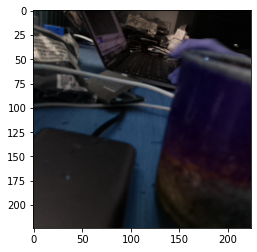

In [3]:
rawCapture = PiRGBArray(camera)
# Petit temps d'attente pour permettre à la caméra de s'initialiser
time.sleep(0.1)
# Prend une image de la caméra
camera.capture(rawCapture, format="bgr")
image_cam = rawCapture.array
plt.imshow(image_cam)



In [4]:
image_cam.shape


(224, 224, 3)

# Classification from camera

In [7]:
model = load_model('./keras_model.h5', compile=False)

In [12]:

data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
# Normalize the image
normalized_image_array = (image_cam.astype(np.float32) / 127.0) - 1
# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
print(prediction)

[[0.00169139 0.99830866]]


## Loop

In [13]:
camera.resolution = (224, 224)
rawCapture = PiRGBArray(camera)
# allow the camera to warmup
time.sleep(0.1)
size = (224, 224)
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

In [14]:

for i in range(10):
    # grab an image from the camera
    start_time=time.time()
    rawCapture = PiRGBArray(camera)
    camera.capture(rawCapture, format="bgr")
    image_cam = rawCapture.array
    print(image_cam.shape)
    print('Time to take picture: '+str(time.time()-start_time))
    
    start_time=time.time()
    #plt.imshow(image_cam)
    
    # Normalize the image
    normalized_image_array = (image_cam.astype(np.float32) / 127.0) - 1
    # Load the image into the array
    data[0] = normalized_image_array
    print('Time to format picture: '+str(time.time()-start_time))

    # run the inference
    start_time=time.time()
    prediction = model.predict(data)
    print('Time to predict: '+str(time.time()-start_time))
    print(prediction)

(224, 224, 3)
Time to take picture: 0.3451223373413086
Time to format picture: 0.011805057525634766
Time to predict: 0.2703213691711426
[[8.3134079e-04 9.9916863e-01]]
(224, 224, 3)
Time to take picture: 0.37966108322143555
Time to format picture: 0.013414621353149414
Time to predict: 0.5219285488128662
[[0.00162589 0.9983741 ]]
(224, 224, 3)
Time to take picture: 0.36420464515686035
Time to format picture: 0.013623237609863281
Time to predict: 0.4685854911804199
[[0.00101076 0.9989893 ]]
(224, 224, 3)
Time to take picture: 0.3834388256072998
Time to format picture: 0.014015674591064453
Time to predict: 0.47808074951171875
[[0.00190774 0.99809223]]
(224, 224, 3)
Time to take picture: 0.31721973419189453
Time to format picture: 0.008650064468383789
Time to predict: 0.4308748245239258
[[0.00205052 0.99794954]]
(224, 224, 3)
Time to take picture: 0.3538706302642822
Time to format picture: 0.013925790786743164
Time to predict: 0.4611625671386719
[[0.00425983 0.9957402 ]]
(224, 224, 3)
Time

# Classification from file

In [10]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np


In [12]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 1280)              410208    
_________________________________________________________________
sequential_3 (Sequential)    (None, 2)                 128300    
Total params: 538,508
Trainable params: 524,428
Non-trainable params: 14,080
_________________________________________________________________
None


In [13]:
#model.layers[0].summary()
#model.layers[0].layers[0].summary()
model.layers[1].summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_Dense1 (Dense)         (None, 100)               128100    
_________________________________________________________________
dense_Dense2 (Dense)         (None, 2)                 200       
Total params: 128,300
Trainable params: 128,300
Non-trainable params: 0
_________________________________________________________________


In [2]:
import ipywidgets as widgets
import threading
import cv2

In [3]:
cap = cv2.VideoCapture(0)

In [4]:
_, frame = cap.read()

In [6]:
#print(frame)

In [13]:
cap.release()

In [15]:
# Stop button
# ================
stopButton = widgets.ToggleButton(
    value=False,
    description='Stop',
    disabled=False,
    button_style='danger', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='square' # (FontAwesome names without the `fa-` prefix)
)


# Display function
# ================
def view(button):
    cap = cv2.VideoCapture(0)
    display_handle=display(None, display_id=True)
    i = 0
    while True:
        _, frame = cap.read()
        frame = cv2.flip(frame, 1) # if your camera reverses your image
        _, frame = cv2.imencode('.jpeg', frame)
        display_handle.update(Image(data=frame.tobytes()))
        if stopButton.value==True:
            cap.release()
            display_handle.update(None)
            break

            
# Run
# ================
display(stopButton)
thread = threading.Thread(target=view, args=(stopButton,))
thread.start()

ToggleButton(value=False, button_style='danger', description='Stop', icon='square', tooltip='Description')

None

## Motor

In [9]:
from gpiozero import Robot
robby = Robot(left=(7,8), right=(9,10))


In [10]:
import time
from adafruit_motorkit import MotorKit



In [17]:
import adafruit_motorkit

In [18]:
kit = MotorKit()


In [19]:

kit.motor1.throttle = 1
time.sleep(1)

kit.motor1.throttle = 0

In [20]:
kit.motor2.throttle = 0.5
kit.motor1.throttle = 0.5
time.sleep(1)

kit.motor2.throttle = 0
kit.motor1.throttle = 0

In [21]:
for i in range(1):
    kit.stepper1.onestep()

## Test WebSocket

In [1]:
from cloudlink import CloudLink
import time


In [2]:
def on_new_packet(message): # message value is automatically converted into a dictionary datatype
    print(message)

def on_message(message): # message value is automatically converted into a dictionary datatype
    print(message)

def on_connect(): # use to start other scripts, in this example we declare a username: "test"
    cl.sendPacket({"cmd": "setid", "val": "test"})

def on_error(error): # does this do something?
    print(error)

cl = CloudLink() # Instanciate the module


CloudLink v0.1.5.2


In [3]:
cl.client("ws://127.0.0.1:3000/",
        on_new_packet = on_new_packet,
        on_connect = on_connect,
        on_error = on_error,
         ) 

{'cmd': 'ulist', 'val': ''}
{'cmd': 'gmsg', 'val': ''}
{'cmd': 'direct', 'val': {'cmd': 'vers', 'val': '0.1.6'}}
{'cmd': 'direct', 'val': {'cmd': 'motd', 'val': 'Hello, World!'}}
{'cmd': 'ulist', 'val': 'test;'}
{'cmd': 'gmsg', 'val': 'Apple'}
{'cmd': 'gmsg', 'val': 'Apple'}
